In [11]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from string import punctuation
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

nltk.download('wordnet')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/minyayao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/minyayao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/minyayao/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/minyayao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

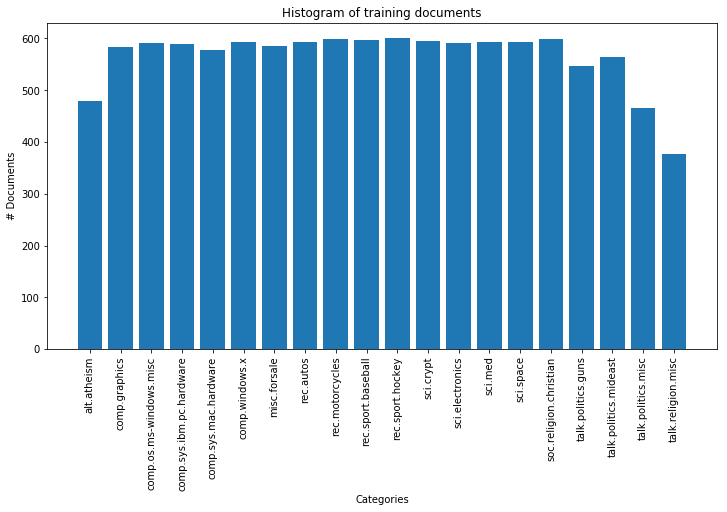

In [13]:
# Q1

newsgroups_train = fetch_20newsgroups(subset='train')
dictt = {}
for i in newsgroups_train.target_names:
    training_data = fetch_20newsgroups(subset='train', categories=[i])
    dictt[i] = len(training_data.data)

fig,ax = plt.subplots()
plt.bar(list(newsgroups_train.target_names), list(dictt.values()))
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=10)
plt.xlabel('Categories')
plt.ylabel('# Documents')
plt.title('Histogram of training documents')
plt.show()

In [14]:
# Q2
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 
              'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 
              'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, 
                                   shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, 
                                  shuffle = True, random_state = None)

#stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
#combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
combined_stopwords = set.union(set(stop_words_en),set(punctuation))

#  Converts Penn Treebank tags to WordNet.
def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

ps = nltk.stem.PorterStemmer()
wnl = nltk.wordnet.WordNetLemmatizer()     

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(list_word)]

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

analyzer = text.CountVectorizer().build_analyzer()

# Remove stopword, number and set min_df = 3
vectorizer = text.CountVectorizer(min_df=3, stop_words='english', analyzer=stem_rmv_punc, token_pattern = r'(?u)\b[A-Za-z][A-Za-z]+\b')

# For the train data
X_train_counts = vectorizer.fit_transform(train_dataset.data)
X_train_counts.toarray()

# For the test data
X_test_counts = vectorizer.transform(test_dataset.data)
X_test_counts.toarray()

# The following is the tfidf part
# For the train data
X_train_tfidf = text.TfidfTransformer().fit_transform(X_train_counts)
print('Shape of TF-IDF train matrices subset: ')
print(X_train_tfidf.shape)

# For the test data
X_test_tfidf = text.TfidfTransformer().fit_transform(X_test_counts)
print('Shape of TF-IDF test matrices subset: ')
print(X_test_tfidf.shape)

Shape of TF-IDF train matrices subset: 
(4732, 16292)
Shape of TF-IDF test matrices subset: 
(3150, 16292)


In [15]:
# Q3 Dimensionality Reduction

# LSI dimensionality reduction

from sklearn.decomposition import TruncatedSVD

lsi = TruncatedSVD(n_components=50, random_state=42) 
X_train_LSI = lsi.fit_transform(X_train_tfidf)
X_test_LSI = lsi.transform(X_test_tfidf)
print('Shape of reduce TF-IDF matrix with LSI: ')
print('Train: ', X_train_LSI.shape)
print('Test: ', X_test_LSI.shape)


# NMF dimensionality reduction

from sklearn.decomposition import NMF

nmf = NMF(n_components=50, random_state=42)
X_train_NMF = nmf.fit_transform(X_train_tfidf)
X_test_NMF = nmf.transform(X_test_tfidf)
print('Shape of reduce TF-IDF matrix with NMF: ')
print('Train: ', X_train_NMF.shape)
print('Test: ', X_test_NMF.shape)


# Compare LSI & NMF

# for NMF
H = nmf.components_
sum_train_NMF = np.sum(np.array(X_train_tfidf - X_train_NMF.dot(H))**2)
sum_test_NMF = np.sum(np.array(X_test_tfidf - X_test_NMF.dot(H))**2)
print(sum_train_NMF)
print(sum_test_NMF)

# for LSI

<4732x16292 sparse matrix of type '<class 'numpy.float64'>'
	with 363811 stored elements in Compressed Sparse Row format>

Question 8: Multiclass Classification

In [49]:
# Q8 Multiclass Classification

# import data and generate LSI-reduced TF-IDF matrix
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
from string import punctuation
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]  #set image size for display

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']
train_dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_dataset = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

ps = nltk.stem.PorterStemmer()
wnl = nltk.wordnet.WordNetLemmatizer()     

def lemmatize_sent(list_word):
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(list_word)]

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

analyzer = text.CountVectorizer().build_analyzer()
vectorizer = text.CountVectorizer(min_df=3, stop_words='english', analyzer=stem_rmv_punc, token_pattern = r'(?u)\b[A-Za-z][A-Za-z]+\b')

X_train_counts = vectorizer.fit_transform(train_dataset.data)
X_train_counts.toarray()
X_test_counts = vectorizer.transform(test_dataset.data)
X_test_counts.toarray()
X_train_tfidf = text.TfidfTransformer().fit_transform(X_train_counts)
print('Shape of TF-IDF train matrices subset: ')
print(X_train_tfidf.shape)
X_test_tfidf = text.TfidfTransformer().fit_transform(X_test_counts)
print('Shape of TF-IDF test matrices subset: ')
print(X_test_tfidf.shape)

#LSI: 
from sklearn.decomposition import TruncatedSVD
lsi = TruncatedSVD(n_components=50, random_state=42) 
X_train_LSI = lsi.fit_transform(X_train_tfidf)
X_test_LSI = lsi.transform(X_test_tfidf)

#NMF:
from sklearn.decomposition import NMF
nmf = NMF(n_components=50, random_state=42)
X_train_NMF = nmf.fit_transform(X_train_tfidf)
X_test_NMF = nmf.transform(X_test_tfidf)

X_train_target = train_dataset.target
X_test_target = test_dataset.target

# For plotting confusion matrix and compute metrics: 
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Spectral):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.tight_layout()


Shape of TF-IDF train matrices subset: 
(2352, 8396)
Shape of TF-IDF test matrices subset: 
(1565, 8396)


Multiclass SVM one vs one (with LSI): 
Confusion matrix, without normalization
[[325  44  23   0]
 [ 35 324  26   0]
 [ 23  18 346   3]
 [  4   1   3 390]]
Normalized confusion matrix
[[0.83 0.11 0.06 0.  ]
 [0.09 0.84 0.07 0.  ]
 [0.06 0.05 0.89 0.01]
 [0.01 0.   0.01 0.98]]


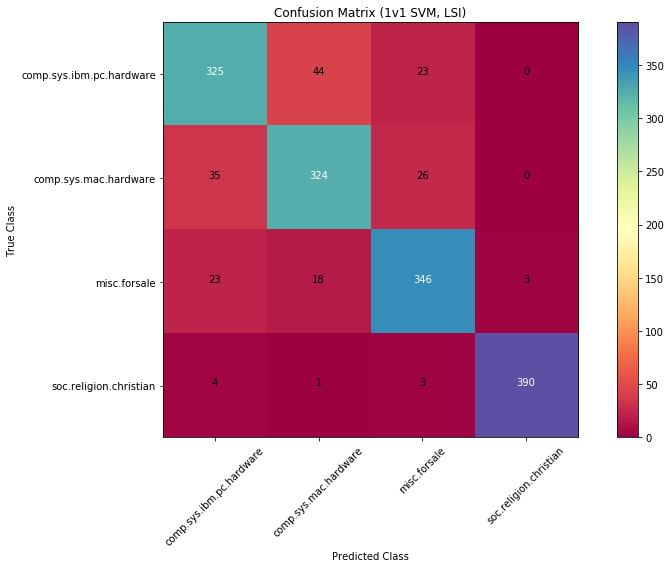

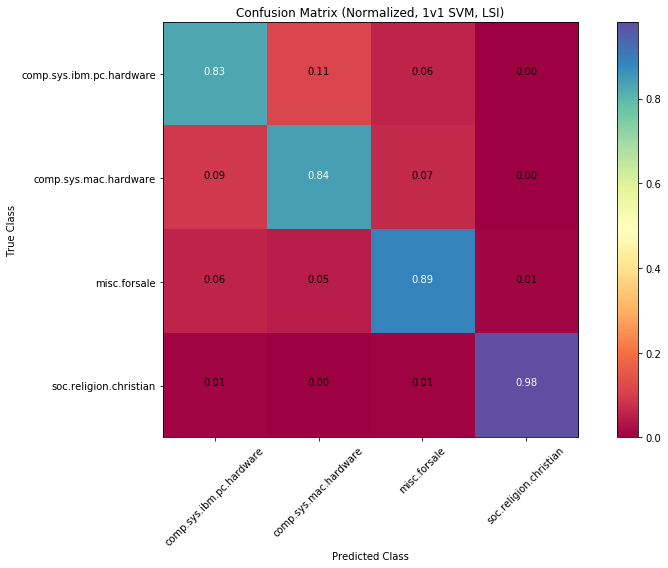

Accuracy:   0.8849840255591054
Recall:     0.8849840255591054
Precision:  0.8853237099011754


In [50]:
# Multiclass SVM (one vs. one)

from sklearn import svm
from sklearn.multiclass import OneVsOneClassifier

print("Multiclass SVM one vs one (with LSI): ")

clf_1v1 = OneVsOneClassifier(svm.SVC(C=1000)).fit(X_train_LSI, X_train_target)
X_predict_1v1 = clf_1v1.predict(X_test_LSI)

cf_mat = confusion_matrix(X_test_target, X_predict_1v1)
np.set_printoptions(precision=2)

#Plot confusion matrices -- unnormalized and normalized
plt.figure()
plot_confusion_matrix(cf_mat, classes=categories,
                      title='Confusion Matrix (1v1 SVM, LSI)')
plt.figure()
plot_confusion_matrix(cf_mat, classes=categories, normalize=True,
                      title='Confusion Matrix (Normalized, 1v1 SVM, LSI)')
plt.show()

# Compute Metrics: 
accuracy = accuracy_score(X_test_target, X_predict_1v1)
recall = recall_score(X_test_target, X_predict_1v1, average='weighted')
precision = precision_score(X_test_target, X_predict_1v1, average='weighted')

print("Accuracy:  ", accuracy)
print("Recall:    ",recall)
print("Precision: ",precision)

Multiclass SVM one vs one (with NMF): 
Confusion matrix, without normalization
[[305  64  23   0]
 [ 92 273  19   1]
 [ 46  17 325   2]
 [ 11   3   3 381]]
Normalized confusion matrix
[[0.78 0.16 0.06 0.  ]
 [0.24 0.71 0.05 0.  ]
 [0.12 0.04 0.83 0.01]
 [0.03 0.01 0.01 0.96]]


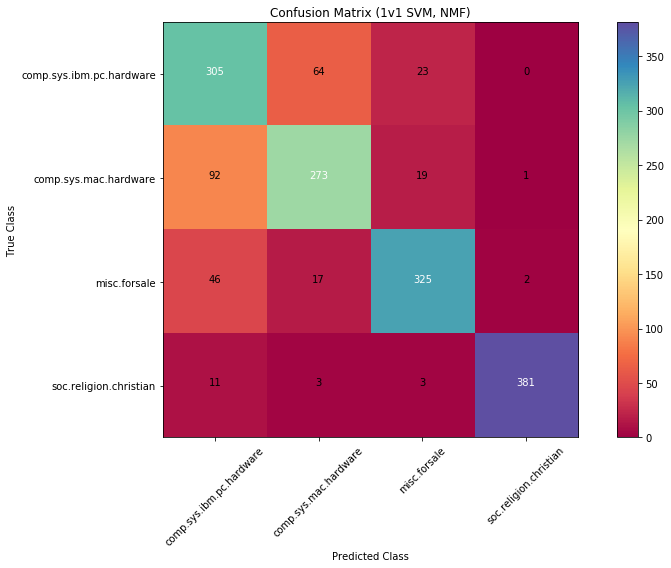

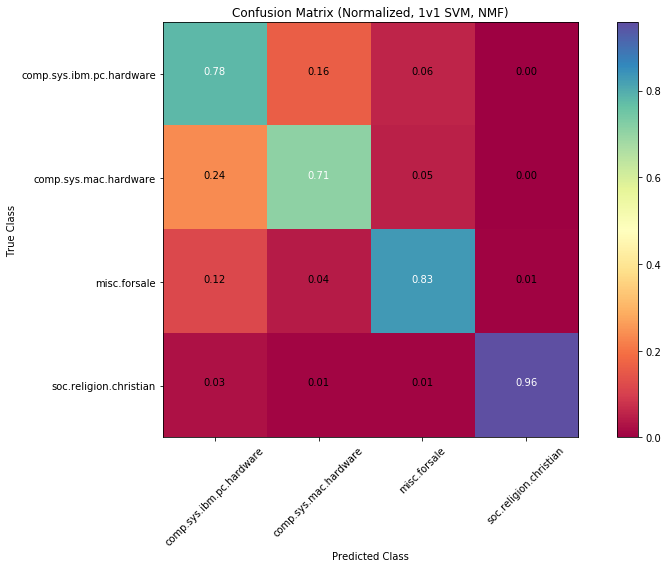

Accuracy:   0.8204472843450479
Recall:     0.8204472843450479
Precision:  0.8276153194214666


In [51]:
print("Multiclass SVM one vs one (with NMF): ")

clf_1v1 = OneVsOneClassifier(svm.SVC(C=1000)).fit(X_train_NMF, X_train_target)
X_predict_1v1 = clf_1v1.predict(X_test_NMF)

cf_mat = confusion_matrix(X_test_target, X_predict_1v1)
np.set_printoptions(precision=2)

#Plot confusion matrices -- unnormalized and normalized
plt.figure()
plot_confusion_matrix(cf_mat, classes=categories,
                      title='Confusion Matrix (1v1 SVM, NMF)')
plt.figure()
plot_confusion_matrix(cf_mat, classes=categories, normalize=True,
                      title='Confusion Matrix (Normalized, 1v1 SVM, NMF)')
plt.show()

# Compute Metrics: 
accuracy = accuracy_score(X_test_target, X_predict_1v1)
recall = recall_score(X_test_target, X_predict_1v1, average='weighted')
precision = precision_score(X_test_target, X_predict_1v1, average='weighted')

print("Accuracy:  ", accuracy)
print("Recall:    ",recall)
print("Precision: ",precision)

Multiclass SVM one vs the rest (with LSI): 
Confusion matrix, without normalization
[[311  52  29   0]
 [ 32 328  23   2]
 [ 20  18 350   2]
 [  5   1   2 390]]
Normalized confusion matrix
[[0.79 0.13 0.07 0.  ]
 [0.08 0.85 0.06 0.01]
 [0.05 0.05 0.9  0.01]
 [0.01 0.   0.01 0.98]]


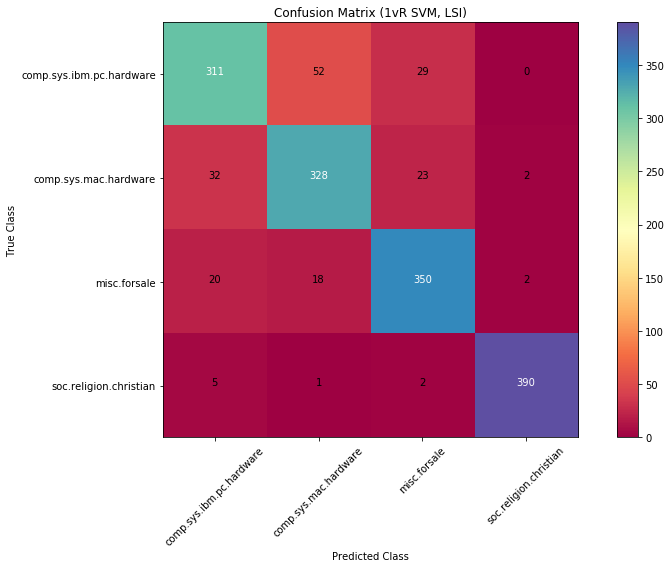

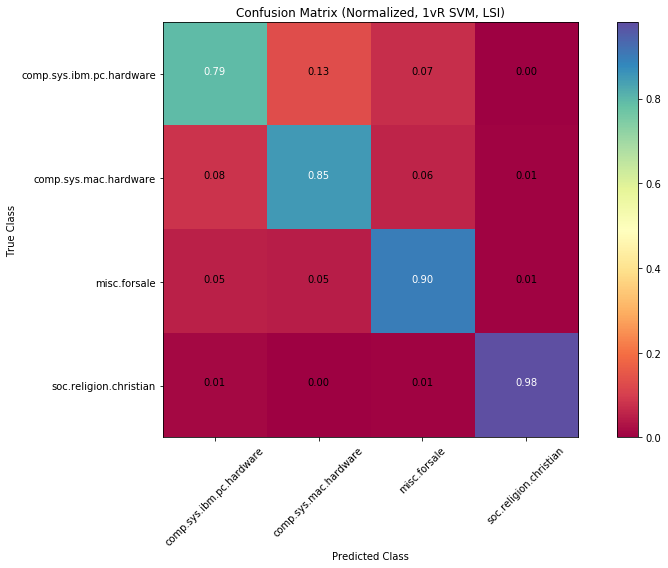

Accuracy:   0.8811501597444089
Recall:     0.8811501597444089
Precision:  0.8815364311549422


In [52]:
# Multiclass SVM (one vs. the rest)

from sklearn.multiclass import OneVsRestClassifier

print("Multiclass SVM one vs the rest (with LSI): ")

clf_1vR = OneVsRestClassifier(svm.SVC(C=1000)).fit(X_train_LSI, X_train_target)
X_predict_1vR = clf_1vR.predict(X_test_LSI)

cf_mat = confusion_matrix(X_test_target, X_predict_1vR)
np.set_printoptions(precision=2)

#Plot confusion matrices -- unnormalized and normalized
plt.figure()
plot_confusion_matrix(cf_mat, classes=categories,
                      title='Confusion Matrix (1vR SVM, LSI)')
plt.figure()
plot_confusion_matrix(cf_mat, classes=categories, normalize=True,
                      title='Confusion Matrix (Normalized, 1vR SVM, LSI)')
plt.show()

# Compute Metrics: 
accuracy = accuracy_score(X_test_target, X_predict_1vR)
recall = recall_score(X_test_target, X_predict_1vR, average='weighted')
precision = precision_score(X_test_target, X_predict_1vR, average='weighted')

print("Accuracy:  ", accuracy)
print("Recall:    ",recall)
print("Precision: ",precision)

Multiclass SVM one vs the rest (with NMF): 
Confusion matrix, without normalization
[[287  64  38   3]
 [ 64 285  28   8]
 [ 29  16 342   3]
 [  5   2   1 390]]
Normalized confusion matrix
[[0.73 0.16 0.1  0.01]
 [0.17 0.74 0.07 0.02]
 [0.07 0.04 0.88 0.01]
 [0.01 0.01 0.   0.98]]


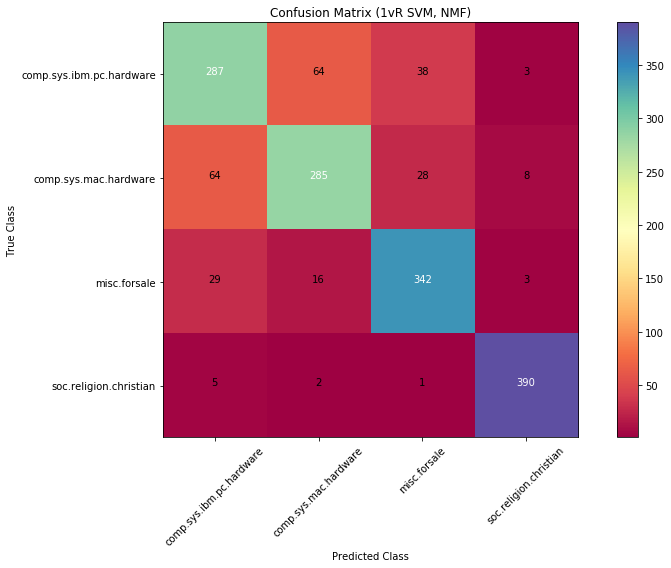

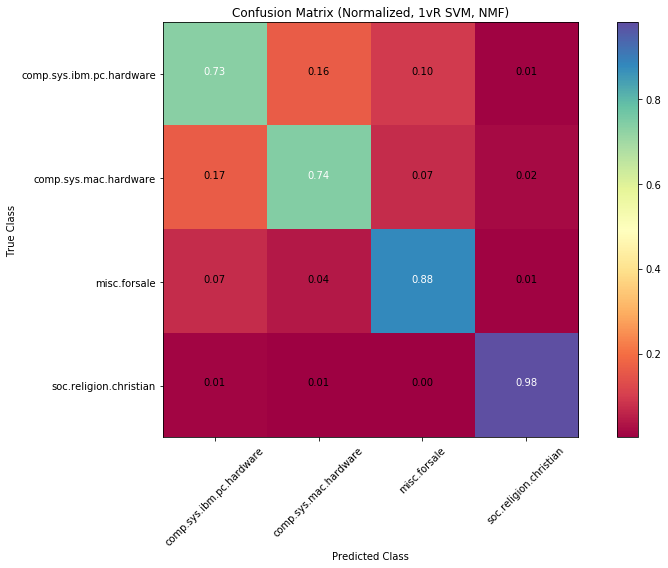

Accuracy:   0.8332268370607029
Recall:     0.8332268370607029
Precision:  0.8316401109794194


In [53]:
print("Multiclass SVM one vs the rest (with NMF): ")

clf_1vR = OneVsRestClassifier(svm.SVC(C=1000)).fit(X_train_NMF, X_train_target)
X_predict_1vR = clf_1vR.predict(X_test_NMF)

cf_mat = confusion_matrix(X_test_target, X_predict_1vR)
np.set_printoptions(precision=2)

#Plot confusion matrices -- unnormalized and normalized
plt.figure()
plot_confusion_matrix(cf_mat, classes=categories,
                      title='Confusion Matrix (1vR SVM, NMF)')
plt.figure()
plot_confusion_matrix(cf_mat, classes=categories, normalize=True,
                      title='Confusion Matrix (Normalized, 1vR SVM, NMF)')
plt.show()

# Compute Metrics: 
accuracy = accuracy_score(X_test_target, X_predict_1vR)
recall = recall_score(X_test_target, X_predict_1vR, average='weighted')
precision = precision_score(X_test_target, X_predict_1vR, average='weighted')

print("Accuracy:  ", accuracy)
print("Recall:    ",recall)
print("Precision: ",precision)

Multiclass Naive Bayes (with NMF): 
Confusion matrix, without normalization
[[310  31  47   4]
 [106 225  48   6]
 [ 66   7 302  15]
 [  2   1   4 391]]
Normalized confusion matrix
[[0.79 0.08 0.12 0.01]
 [0.28 0.58 0.12 0.02]
 [0.17 0.02 0.77 0.04]
 [0.01 0.   0.01 0.98]]


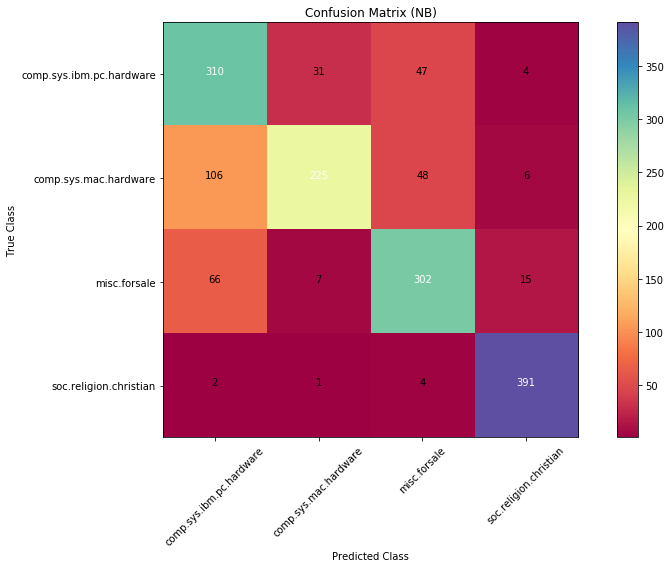

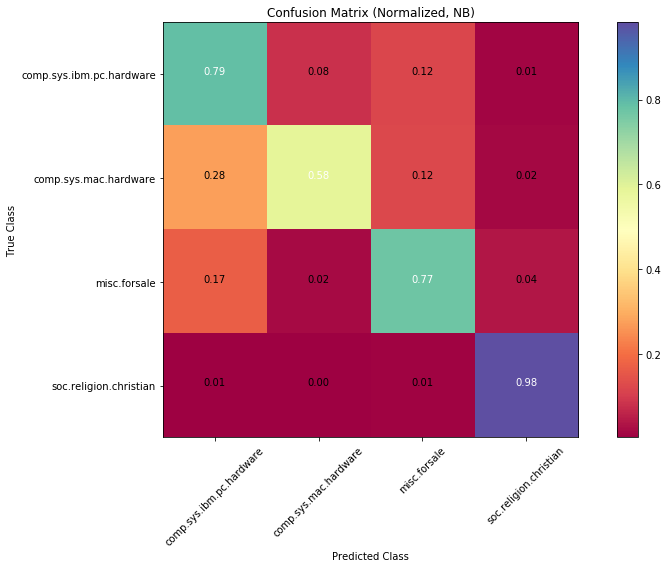

Accuracy:   0.7846645367412141
Recall:     0.7846645367412141
Precision:  0.7968030809314454


In [47]:
# Multiclass Naive Bayes with NMF

from sklearn.naive_bayes import MultinomialNB
print("Multiclass Naive Bayes (with NMF): ")

mnb = MultinomialNB()
mnb.fit(X_train_NMF, X_train_target)
X_predict_NB = mnb.predict(X_test_NMF)

cf_mat = confusion_matrix(X_test_target, X_predict_NB)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cf_mat, classes=categories,
                      title='Confusion Matrix (NB)')

plt.figure()
plot_confusion_matrix(cf_mat, classes=categories, normalize=True,
                      title='Confusion Matrix (Normalized, NB)')

plt.show()

# Compute Metrics: 
accuracy = accuracy_score(X_test_target, X_predict_NB)
recall = recall_score(X_test_target, X_predict_NB, average='weighted')
precision = precision_score(X_test_target, X_predict_NB, average='weighted')
print("Accuracy:  ", accuracy)
print("Recall:    ",recall)
print("Precision: ",precision)
